In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.optimizers import Adadelta, SGD, Adam, RMSprop
from keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**PLOT RANDOMLY SELECTED TRAIN IMAGES**

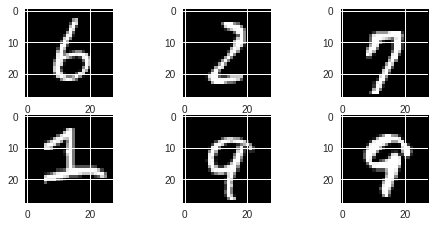

In [24]:
for i in range(1,7):
  plt.subplot(3,3,i)
  random_num = np.random.randint(0,len(x_train))
  plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

**PROCESS DATASET**

In [0]:
# Normalize the Training Dataset and Reshape
x_train = x_train.reshape(x_train.shape[0],28,28,1) / 255.0
x_test = x_test.reshape(x_test.shape[0],28,28,1) / 255.0

# One Hot Encoding for The Labels

from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


**Building Model**

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics = ['accuracy'])


In [31]:
my_model = model.fit(x_train,y_train,batch_size = 32,epochs=10,verbose=1,validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.1954 - acc: 0.9412 - val_loss: 0.0452 - val_acc: 0.9857
Epoch 2/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.0813 - acc: 0.9754 - val_loss: 0.0355 - val_acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.0611 - acc: 0.9815 - val_loss: 0.0328 - val_acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.0521 - acc: 0.9840 - val_loss: 0.0314 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.0431 - acc: 0.9871 - val_loss: 0.0284 - val_acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0290 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.0334 - acc: 0.9893 - val_loss: 0.

In [33]:
score = model.evaluate(x_test,y_test,verbose=0)
print(score)

[0.02739092648668634, 0.9934]


In [34]:
print("Test Loss",score[0])
print("Test Accuracy",score[1])

Test Loss 0.02739092648668634
Test Accuracy 0.9934


**Plotting our Loss and accuracy charts**

In [37]:
model_history = my_model.history
model_history

{'acc': [0.9412333333333334,
  0.97545,
  0.9815166666666667,
  0.9840166666666667,
  0.9871333333333333,
  0.9883666666666666,
  0.9893166666666666,
  0.9907833333333333,
  0.9909,
  0.9925333333333334],
 'loss': [0.19541264781256518,
  0.0813143524867172,
  0.06112218288522369,
  0.05206799882890967,
  0.04314253465082341,
  0.036957035217500135,
  0.03342030988188538,
  0.027949981708643948,
  0.02715194125238098,
  0.02360546763667929],
 'val_acc': [0.9857,
  0.9881,
  0.9895,
  0.9898,
  0.9913,
  0.9916,
  0.9917,
  0.9922,
  0.9923,
  0.9934],
 'val_loss': [0.04520040966900997,
  0.03548232075780834,
  0.03276524749070304,
  0.03142919294945677,
  0.028439978971519668,
  0.028967871970987834,
  0.03225003747526525,
  0.033052480693270624,
  0.02704312038539474,
  0.02739092648668634]}

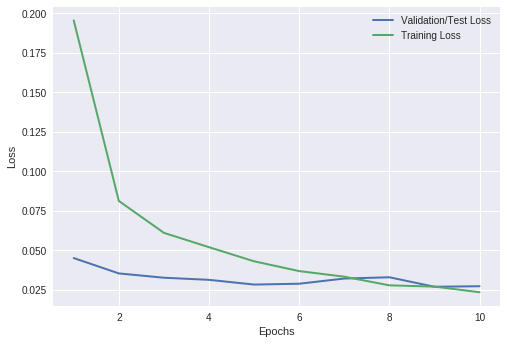

In [38]:
val_loss_values = model_history["val_loss"]
loss_values = model_history["loss"]
epochs = range(1,len(loss_values)+1)
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


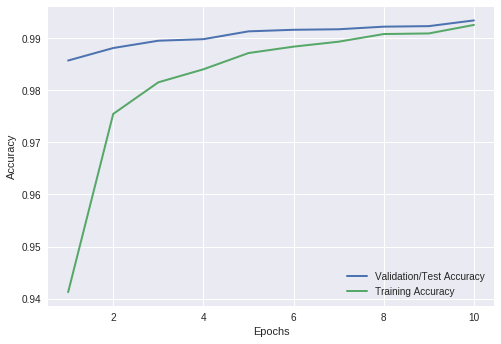

In [40]:
acc_values = model_history['acc']
val_acc_values = model_history['val_acc']

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved
